# Introduction to <font color= #b30047>[Keras](https://keras.io/)</font> using the Font type Recognition Example
<img src=https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png width=200 height = 70>


* <font size=5 color='green'>[MSTC](http://mstc.ssr.upm.es/big-data-track) seminar on Deep Learning, Tensorflow & Keras</font>

## Keras: The Python Deep Learning library

Keras was initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System).

**Keras (κέρας) means horn in Greek.**

    In the Odyssey dream spirits are divided between those who deceive men with false visions, who arrive to Earth through a gate of ivory, and those who announce a future that will come to pass, who arrive through a gate of horn. 
    


## Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

**It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.**

Guiding principles:

-   User friendliness.
    
-   Modularity. A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as little restrictions as possible.

-   Easy extensibility. New modules are simple to add (as new classes and functions).

-   Work with Python. Keras is compatible with: Python 2.7-3.6 .


## Import <font color= #b30047>[Keras](https://keras.io/)</font> as Python package

    Notice that we will use a TensorFlow backend

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [2]:
print(keras.__version__)

2.1.5


## <font color= #00cc00>Next cells load the Font Type dataset:</font>

    ... same as in TensorFlow Notebook

In [0]:
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
"""
Load and data
"""

import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
    
    
# Load data
data = np.load('data_with_labels.npz')

train = data['arr_0']/255.
labels = data['arr_1']

## Beyond Layers and Models [Keras](https://keras.io/) provides many usefull tools such as:
- ###  image and text preprocessing, metrics, Scikit-learn API, utilities, ... (see Keras Documentation)
### <font color= #00cc00>In the next cell:</font>
    One-Hot-Encoding of labels using Keras (see https://keras.io/utils/#to_categorical)

In [0]:
from keras.utils import to_categorical
onehot= to_categorical(labels, num_classes=len(np.unique(labels)))


In [7]:
print(onehot[0:5])

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


### Permutation! + split data into training / validation

In [0]:
 
# Split data into training (90%) and validation (10%)
np.random.seed(100)

indices = np.random.permutation(train.shape[0])

valid_cnt = int(train.shape[0] * 0.1)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test, train = train[test_idx,:],\
              train[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]
  

In [8]:
print('Train shape=', train.shape , '\nTest shape=', test.shape)

Train shape= (2511, 36, 36) 
Test shape= (279, 36, 36)


### Reshape to represent each image as a vector

In [0]:
train=train.reshape([-1,train.shape[1]*train.shape[2]])
test=test.reshape([-1,test.shape[1]*test.shape[2]])

In [10]:
print('Train shape=', train.shape , '\nTest shape=', test.shape)

Train shape= (2511, 1296) 
Test shape= (279, 1296)


# <font color= #b30047>[Keras](https://keras.io/) Models </font>

- ## The core data structure of Keras is a model, a way to organize layers.


## The construction of deep learning models in Keras is as follows:

1.   **Define your model**. Create a sequence and add layers.
2.   **Compile your model**. Specify loss functions and optimizers
3.   **Fit your model**. Execute the model using data.
4.   **Make predictions**. Use the model to generate predictions on new data.






## 1.   **Define your model**. Create a sequence and add layers.

* The simplest type of model is the <font color= #b30047>**Sequential**</font> model: a linear stack of layers.

For more complex architectures, you should use the <font color= #b30047>**Keras functional API**</font>, which allows to build arbitrary graphs of layers.


In [0]:
from keras.models import Sequential

model = Sequential()


* Stacking layers is as easy as <font color= #b30047>**.add()**</font>

      To stack layers you must first import the types of layers you want: in our case Dense (we could also add Dropout, Activation)
      

In [0]:
from keras.layers import Dense


model.add(Dense(128, activation='relu', input_dim=train.shape[1]))
# Dense(128) is a fully-connected layer with 128 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 1296-dimensional vectors.


model.add(Dense(32, activation='sigmoid'))

## onehot_train.shape[1] is the number of classes
model.add(Dense(onehot_train.shape[1], activation='softmax'))

### ... adding more layers is easy (try uncommenting options in this cell)

In [0]:
#from keras.layers import Dense, Dropout, Activation


#model.add(Dense(128, activation='relu', input_dim=train.shape[1]))
## Dense(128) is a fully-connected layer with 128 hidden units.
## in the first layer, you must specify the expected input data shape:
3# here, 1296-dimensional vectors.

#model.add(Dropout(0.5))
#model.add(Dense(32, activation='relu'))

#model.add(Dense(32, activation='sigmoid'))
#model.add(Dropout(0.5))

## onehot_train.shape[1] is the number of classes
#model.add(Dense(onehot_train.shape[1], activation='softmax'))


## Note that differently from TensorFlow:

* Declaring the **input shape** is only required of the **first layer** – Keras is good enough to work out the size of the tensors flowing through the model from there.

* We don’t have to declare any **weights** or **bias** variables like we do in TensorFlow.

## We can now define what type of <font color= #b30047>**optimizer**</font> to use (i.e. gradient descent, Adam optimiser etc.).

*  Although optimizer (and loss function) can be also defined when compiling the model.



In [0]:
from keras.optimizers import SGD


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

## 2.   **Compile your model**. Specify loss functions and optimizers

### FROM:

<img src=https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/Long-Short-Term-Memory-Networks-With-Python.png width=250 height=300>
<br>
*Once we have dened our network, we must compile it. Compilation is an eficiency step. It
transforms the simple sequence of layers that we dened into a highly eficient series of matrix
transforms in a format intended to be executed on your GPU or CPU, depending on how Keras
is congured. Think of compilation as a precompute step for your network. It is always required
after dening a model.*

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

### Compilation requires a number of parameters to be specified, specifically tailored to training your network:
* the **optimization algorithm** to use to train the network 
* and the **loss function** used to evaluate the network that is minimized by the optimization algorithm.

      You can also specify metrics to collect while fitting your model in addition to the loss function. Generally, the most useful additional metric to collect is accuracy for classification problems (e.g. `accuracy' or `acc' for short). The metrics to collect are specified by name in an array of metric or loss function names, for example metrics=['accuracy']

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               166016    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 170,309
Trainable params: 170,309
Non-trainable params: 0
_________________________________________________________________


In [0]:
32*128+32

4128

## 3.   **Fit your model**. Train the model using data.

* We first pass in all of our training data, in our case, *train* data and *OHE labels* onehot_train.
* The next argument is the batch size – we don’t have to explicitly handle the batching up of our data during training in Keras, rather we just specify the batch size and it does it for us (in this example batch size is 128)

      However you can choose to feed batches to your model manually: model.train_on_batch(train_batch, onehot_train_batch)


* Next we pass the number of training epochs (20 in this case).
* A verbose flag, set to 1 here, specifies if you want detailed information being printed in the console about the progress of the training.

In [20]:
model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         verbose=1)

Epoch 1/100
2511/2511 [==============================] - 0s 70us/step - loss: 1.6562 - acc: 0.2577
Epoch 2/100
2511/2511 [==============================] - 0s 39us/step - loss: 1.4877 - acc: 0.3449
Epoch 3/100
2511/2511 [==============================] - 0s 38us/step - loss: 1.4074 - acc: 0.5392
Epoch 4/100
2511/2511 [==============================] - 0s 43us/step - loss: 1.3436 - acc: 0.5950
Epoch 5/100
2511/2511 [==============================] - 0s 41us/step - loss: 1.2840 - acc: 0.6137
Epoch 6/100
2511/2511 [==============================] - 0s 41us/step - loss: 1.2272 - acc: 0.6241
Epoch 7/100
2511/2511 [==============================] - 0s 39us/step - loss: 1.1700 - acc: 0.6268
Epoch 8/100
2511/2511 [==============================] - 0s 42us/step - loss: 1.1183 - acc: 0.6432
Epoch 9/100
2511/2511 [==============================] - 0s 39us/step - loss: 1.0708 - acc: 0.6571
Epoch 10/100
2511/2511 [==============================] - 0s 42us/step - loss: 1.0269 - acc: 0.6750
Epoch 11/

Epoch 24/100
2511/2511 [==============================] - 0s 43us/step - loss: 0.6297 - acc: 0.7901
Epoch 25/100
2511/2511 [==============================] - 0s 42us/step - loss: 0.6102 - acc: 0.7993
Epoch 26/100
2511/2511 [==============================] - 0s 46us/step - loss: 0.5899 - acc: 0.8053
Epoch 27/100
2511/2511 [==============================] - 0s 42us/step - loss: 0.5702 - acc: 0.8136
Epoch 28/100
2511/2511 [==============================] - 0s 44us/step - loss: 0.5524 - acc: 0.8252
Epoch 29/100
2511/2511 [==============================] - 0s 42us/step - loss: 0.5332 - acc: 0.8367
Epoch 30/100
2511/2511 [==============================] - 0s 45us/step - loss: 0.5173 - acc: 0.8387
Epoch 31/100
2511/2511 [==============================] - 0s 46us/step - loss: 0.4985 - acc: 0.8534
Epoch 32/100
2511/2511 [==============================] - 0s 42us/step - loss: 0.4825 - acc: 0.8534
Epoch 33/100
2511/2511 [==============================] - 0s 47us/step - loss: 0.4665 - acc: 0.8618


2511/2511 [==============================] - 0s 44us/step - loss: 0.2841 - acc: 0.9283
Epoch 49/100
2511/2511 [==============================] - 0s 44us/step - loss: 0.2739 - acc: 0.9287
Epoch 50/100
2511/2511 [==============================] - 0s 42us/step - loss: 0.2652 - acc: 0.9355
Epoch 51/100
2511/2511 [==============================] - 0s 45us/step - loss: 0.2558 - acc: 0.9403
Epoch 52/100
2511/2511 [==============================] - 0s 42us/step - loss: 0.2483 - acc: 0.9411
Epoch 53/100
2511/2511 [==============================] - 0s 44us/step - loss: 0.2399 - acc: 0.9442
Epoch 54/100
2511/2511 [==============================] - 0s 42us/step - loss: 0.2316 - acc: 0.9474
Epoch 55/100
2511/2511 [==============================] - 0s 44us/step - loss: 0.2235 - acc: 0.9498
Epoch 56/100
2511/2511 [==============================] - 0s 41us/step - loss: 0.2176 - acc: 0.9546
Epoch 57/100
2511/2511 [==============================] - 0s 44us/step - loss: 0.2090 - acc: 0.9542
Epoch 58/100


2511/2511 [==============================] - 0s 48us/step - loss: 0.1232 - acc: 0.9845
Epoch 74/100
2511/2511 [==============================] - 0s 41us/step - loss: 0.1190 - acc: 0.9861
Epoch 75/100
2511/2511 [==============================] - 0s 42us/step - loss: 0.1152 - acc: 0.9877
Epoch 76/100
2511/2511 [==============================] - 0s 46us/step - loss: 0.1118 - acc: 0.9881
Epoch 77/100
2511/2511 [==============================] - 0s 43us/step - loss: 0.1085 - acc: 0.9892
Epoch 78/100
2511/2511 [==============================] - 0s 44us/step - loss: 0.1059 - acc: 0.9904
Epoch 79/100
2511/2511 [==============================] - 0s 41us/step - loss: 0.1023 - acc: 0.9900
Epoch 80/100
2511/2511 [==============================] - 0s 48us/step - loss: 0.0992 - acc: 0.9916
Epoch 81/100
2511/2511 [==============================] - 0s 51us/step - loss: 0.0960 - acc: 0.9920
Epoch 82/100
2511/2511 [==============================] - 0s 45us/step - loss: 0.0934 - acc: 0.9912
Epoch 83/100


Epoch 98/100
2511/2511 [==============================] - 0s 41us/step - loss: 0.0604 - acc: 0.9960
Epoch 99/100
2511/2511 [==============================] - 0s 44us/step - loss: 0.0590 - acc: 0.9964
Epoch 100/100
2511/2511 [==============================] - 0s 43us/step - loss: 0.0572 - acc: 0.9972


## 4.   **Make predictions**. Use the model to generate predictions on new data.

* The model evaluates the loss across all of the test data, as well as any other metrics specified when the model was compiled, like classification accuracy.

* A list of evaluation metrics is returned. For example, for a model compiled with the accuracy metric, we could evaluate it on a new dataset.

      Note that evaluation is done in batches

In [21]:
# Check accuracy on train set

loss, accuracy = model.evaluate(train, onehot_train, batch_size=128)


print('\nTraining Accuracy=', accuracy)

2511/2511 [==============================] - 0s 20us/step

Training Accuracy= 0.997610513739546


In [22]:
# Check accuracy on test set

loss, accuracy = model.evaluate(test, onehot_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

279/279 [==============================] - 0s 59us/step

Test Accuracy= 0.8817204286120699


# Get predictions / probabilities ...

In [23]:
pred_probabilities= model.predict(test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',onehot_test[0:5])

First Five Probs.:
 [[1.1230685e-02 1.8178862e-02 2.2206610e-04 7.7702370e-03 9.6259820e-01]
 [2.3726657e-01 7.0010614e-01 5.9051193e-02 3.6224237e-04 3.2139574e-03]
 [5.5765628e-04 2.7860487e-01 2.7692977e-05 5.5231778e-03 7.1528661e-01]
 [5.3933984e-01 6.5770987e-03 4.5300499e-01 2.1111556e-04 8.6685747e-04]
 [5.9199445e-03 1.1870438e-02 4.4829244e-06 2.2430910e-01 7.5789601e-01]]


First Five Classes:
 [[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


## Confusion Matrix

In [24]:
!pip install pandas_ml

    100% |████████████████████████████████| 81kB 3.7MB/s 
  Running setup.py bdist_wheel for pandas-ml ... - \ done
  Stored in directory: /content/.cache/pip/wheels/13/57/a6/6c0dc8cffa09bb45bfb0b4f88fc13871342bac6a6394784f83
Successfully built pandas-ml


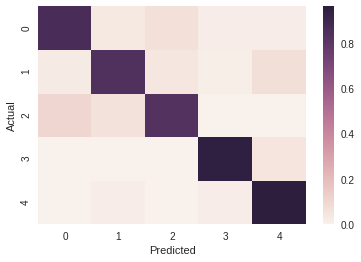

In [22]:
from pandas_ml import ConfusionMatrix

ConfMatrix=ConfusionMatrix(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

ConfMatrix.plot(normalized=True,backend='seaborn')

Confusion Matrix:
 [[53  2  4  1  1]
 [ 2 60  3  1  5]
 [ 5  3 40  0  0]
 [ 0  0  0 41  2]
 [ 0  1  0  1 54]]


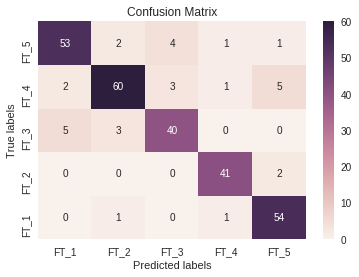

In [24]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5'])
ax.yaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5']);

### ... you can also check *validation data* while training...

In [26]:
model.fit(train, onehot_train,
         epochs=10,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=1)

Train on 2511 samples, validate on 279 samples
Epoch 1/10
2511/2511 [==============================] - 0s 49us/step - loss: 0.0444 - acc: 0.9984 - val_loss: 0.2985 - val_acc: 0.8925
Epoch 2/10
2511/2511 [==============================] - 0s 42us/step - loss: 0.0435 - acc: 0.9984 - val_loss: 0.3003 - val_acc: 0.8889
Epoch 3/10
2511/2511 [==============================] - 0s 47us/step - loss: 0.0425 - acc: 0.9988 - val_loss: 0.2989 - val_acc: 0.8853
Epoch 4/10
2511/2511 [==============================] - 0s 47us/step - loss: 0.0415 - acc: 0.9988 - val_loss: 0.2989 - val_acc: 0.8961
Epoch 5/10
2511/2511 [==============================] - 0s 46us/step - loss: 0.0407 - acc: 0.9988 - val_loss: 0.2998 - val_acc: 0.8961
Epoch 6/10
2511/2511 [==============================] - 0s 46us/step - loss: 0.0399 - acc: 0.9992 - val_loss: 0.2953 - val_acc: 0.8961
Epoch 7/10
2511/2511 [==============================] - 0s 44us/step - loss: 0.0391 - acc: 0.9992 - val_loss: 0.2989 - val_acc: 0.8925
Epoch 8/

## NOTE: that model.fit do not initialize training...



In [28]:
# If you want initialize the model

from keras import backend as K
def reset_weights(model):
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)
            
reset_weights(model)

model.fit(train, onehot_train,
         epochs=10,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=1)

Train on 2511 samples, validate on 279 samples
Epoch 1/10
2511/2511 [==============================] - 0s 38us/step - loss: 1.6579 - acc: 0.2135 - val_loss: 1.5805 - val_acc: 0.2724
Epoch 2/10
2511/2511 [==============================] - 0s 34us/step - loss: 1.5359 - acc: 0.3660 - val_loss: 1.5208 - val_acc: 0.3262
Epoch 3/10
2511/2511 [==============================] - 0s 38us/step - loss: 1.4568 - acc: 0.4683 - val_loss: 1.4617 - val_acc: 0.4695
Epoch 4/10
2511/2511 [==============================] - 0s 37us/step - loss: 1.3899 - acc: 0.5595 - val_loss: 1.4008 - val_acc: 0.5018
Epoch 5/10
2511/2511 [==============================] - 0s 38us/step - loss: 1.3268 - acc: 0.5723 - val_loss: 1.3378 - val_acc: 0.5269
Epoch 6/10
2511/2511 [==============================] - 0s 37us/step - loss: 1.2645 - acc: 0.5862 - val_loss: 1.2826 - val_acc: 0.5520
Epoch 7/10
2511/2511 [==============================] - 0s 35us/step - loss: 1.2039 - acc: 0.6264 - val_loss: 1.2269 - val_acc: 0.5484
Epoch 8/

... you can also get useful **History** info...

In [0]:
reset_weights(model)

history=model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=0)

In [31]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


reset_weights(model)[-1]

Train Accuracy:  0.99
Test_Accuracy:  0.89


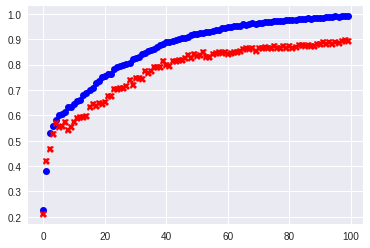

In [40]:
print('Train Accuracy: ',np.round(history.history['acc'][-1],2))
print('Test_Accuracy: ',np.round(history.history['val_acc'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['acc'],'bo')
plt.plot(history.history['val_acc'],'rX')